In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('mnist_train.csv')

In [3]:
print(data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [4]:
# store lable column into a new variable
l = data['label']

d = data.drop('label', axis=1)

In [5]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


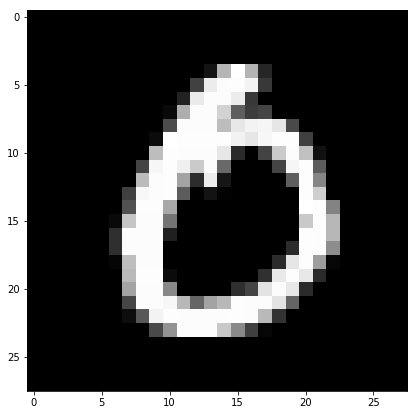

0


In [6]:
plt.figure(figsize=(7,7))
idx = 200

grid_data = d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data, cmap='gray')

plt.show()

print(l[idx])

# 2D Visualization of PCA

In [7]:
labels = l.head(15000)
data = d.head(15000)

print(data.shape)

(15000, 784)


In [8]:
# Data Pre-processing

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [9]:
# Find the co-variance matrix

sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T, sample_data)
print(covar_matrix.shape)

(784, 784)


In [10]:
# Now compute the Eigen values and Eigen vectors

from scipy.linalg import eigh

# get the top two eigen values and eigen vectors
# eigh will return values in ascending order
# so we can take 782, 783 values which will have max values

values, vectors = eigh(covar_matrix, eigvals=(782, 783))

print(vectors.shape)

vectors = vectors.T

print(vectors.shape)

(784, 2)
(2, 784)


In [11]:
import matplotlib.pyplot as plt

#project original data onto plane
# this is done by multiplying two eigen vectors by vector-vector multiplication

new_coordinates = np.matmul(vectors, sample_data.T)
print(new_coordinates.shape)

(2, 15000)


In [12]:
print(new_coordinates)

[[ -5.5586608    6.19363477  -1.90987794 ...,  -2.14793723   3.20412249
   -6.87896871]
 [ -5.04355835  19.30527806  -7.67877525 ...,  -1.50726893  -6.53731291
   -1.25625388]]


In [13]:
import pandas as pd

new_coordinates = np.vstack((new_coordinates, labels)).T
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


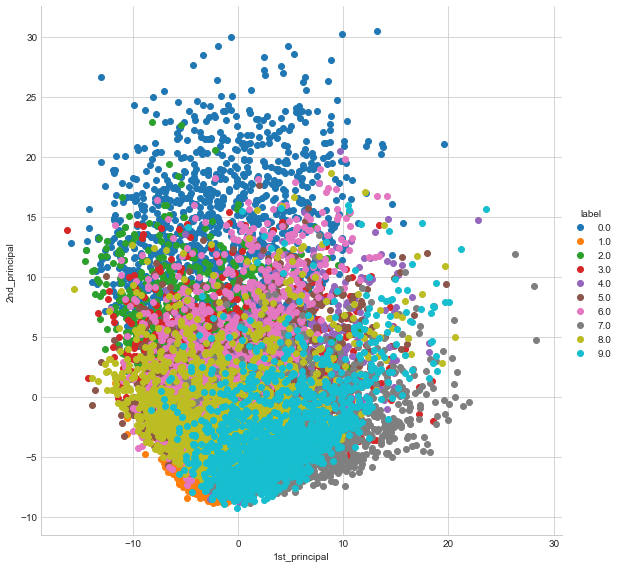

In [14]:
import seaborn as sns

sns.set_style("whitegrid")
sns.FacetGrid(dataframe, hue="label", size=8) \
    .map(plt.scatter, "1st_principal", "2nd_principal") \
    .add_legend()
    
plt.show()

# TSNE

In [32]:
from sklearn.manifold import TSNE

In [33]:
# picking only 1000 points as TSNE takes lot of time for processing 40k points

data_1000 = standardized_data[0:40000, :]
label_1000 = labels[0:40000]

In [34]:
model = TSNE(n_components=2, random_state=0)

tsne_data = model.fit_transform(data_1000)

tsne_data = np.vstack((tsne_data.T, label_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "label"))


In [35]:
sns.set_style("whitegrid")
sns.FacetGrid(tsne_df, hue="label", size=8) \
    .map(plt.scatter, "dim1", "dim2") \
    .add_legend()
    
plt.show()